# Avanced Automation - Assignment 1 
To be delivered until 2024-12-06 23:59:59.

**Submission Notes**:
- You should use Google Colab for the assignment. 
- After running the entire notebook (including graphs and outputs), save the notebook as a .pdf file, by going to File - Print - Destination: Save as PDF.
- Create a .zip file containing both the .ipynb file (the notebook itself) and the .pdf and submit it in Fénix.

## Section 1 -- Linear Regression

**1.** Consider a dataset with 100 observations, containing a single predictor and a quantitative response. Two different models are fitted to the data, a linear regression ($m_1: Y = \beta_0 + \beta_1 X + \epsilon$) and a cubic regression ($m_2: Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 X^3 + \epsilon$).

**1.a)** Suppose that the actual relation between X and Y is linear. Can the **training** residual sum of squares (RSS) of the linear model be expected to be smaller, larger or equal to the one from the cubic model? Or is there no information to tell? Justify your answer.

<div style="background-color: #d0e7ff; padding: 10px; border-radius: 5px; color: #003366;">
  <p>     
 <strong>Answer:</strong><br>
In this scenario, the cubic model is more flexible, so the cubic model will more closely fit
to the training data than the linear model, even though the true relation between X and Y
is linear. So in terms of training RSS, the linear model will have a higher training RSS than
the cubic model.
  </p>
</div>

**1.2** Answer question 1.a) considering the test RSS rather than the training RSS.

<div style="background-color: #d0e7ff; padding: 10px; border-radius: 5px; color: #003366;">
  <p>       
 <strong>Answer:</strong><br>
We expect the test RSS to be smaller for the linear model because we know the true
relationship between X and Y. Besides that, the superior flexibility of the cubic model that
contributed to a lower training RSS will result in an overfitting model, and contribute to a
higher test RSS for the cubic model.
  </p>
</div>

**1.3** Suppose that the actual relationship between X and Y is not linear, but it is not known how far it is from being linear. What is it expected of the the **training** RSS for the linear compared with the cubic models? Or is there not enough information? Justify your answer.

<div style="background-color: #d0e7ff; padding: 10px; border-radius: 5px; color: #003366;">
  <p> 
 <strong>Answer:</strong>

Keeping in mind that a cubic model is more flexible than a linear one, and that although we don't know how far the relation between X and Y is from being linear, we can assume, even without enough information to be certain, that the cubic model will have a lower training RSS than a linear model, because it's superior flexibility will be better suited to fit the training data.

  </p>
</div>

**1.4** Answer question 1.c) considering the test RSS rather than the training RSS.

<div style="background-color: #d0e7ff; padding: 10px; border-radius: 5px; color: #003366;">
  <p>    
 <strong>Answer:</strong>

Analysing this situation in the context of training data changes the answer significantly, because the cubic model is more prone to overfiting the training data than the linear model. Thus, the test RSS relies more on the true relation between X and Y. If the true relationship is close to linear, the linear model will have a lower test RSS than the cubic model, but if the relationship is very non-linear, the cubic model will have a lower test RSS. So, concluding, without additional information it isn't possible to make any conclusive statements about the better model.

  </p>
</div>

**2.** Consider now a dataset of measurements of physical measurements of crabs in the Boston area.

The dataset has the following variables:
- `sex` - Sex of the crab, either male (M), female (F) or indeterminate (I).
- `length` - Length of the crab (in feet)
- `diameter` - Diameter of the crab (in feet)
- `height` - Height of the crab (in feet)
- `weight` - Weight of the crab (in ounces)
- `shucked_weight` - Weight without the shell (in ounces)
- `viscera_weight` - Weight of internal organs (in ounces)
- `shell_weight` - Weight of the shell (in ounces)
- `age` - Age of the crab (in months)

In [20]:
# ------------- Imports and Properties of the code

import numpy as np
import pandas as pd
import sklearn as skl
import scipy as scp
import matplotlib as plt
import seaborn as sb
from IPython.display import display, HTML

# Define custom CSS for the table
table_style = """
<style>
    .dataframe {
        width: 70%;
        border-collapse: collapse;
        margin-top: 10px;
    }
    .dataframe th, .dataframe td {
        border: 1px solid #003366; /* Border color */
        padding: 5px; /* Reduced padding for a more compact look */
        text-align: center;
        background-color: #f0f8ff; /* Light background for table cells */
        max-width: 150px; /* Set a maximum width for header cells */
        overflow: hidden; /* Hide overflow text */
        white-space: nowrap; /* Prevent text from wrapping */
        text-overflow: ellipsis; /* Add ellipsis for overflow text */
    }
    .dataframe th {
        background-color: #d0e7ff; /* Header background color */
        color: #003366; /* Header text color */
        font-weight: bold; /* Make header text bold */
    }
</style>
"""


**2.1** Load the dataset `crab_data.csv`. 

In [21]:
# Read dataset
db = pd.read_csv('crab_data.csv') #pd.read_csv will read the dataset
html_table = db.head().to_html(index = False, border = 0, classes = 'dataframe', justify = 'center') #Displays the head of the dataset

# Define the HTML for the header with the formula and the table
header_html = f"""
<div style="background-color: #d0e7ff; padding: 10px; border-radius: 5px; color: #003366;">
    <p>
      <strong>Head of crab_data DataSet</strong>
  </p>
  {html_table}
</div>
"""

# Display the custom CSS and the header with the formula and the table
display(HTML(table_style + header_html))

**2.2** Check if the dataset has missing values. If so, discard any row that has a missing value.

In [22]:
db_check=db.isnull().sum().sort_values(ascending=False) #Check which values in the data are null and add a value to the head and sort by value
db_check_df = db_check.reset_index()
db_check_df.columns = ['Column', 'Null Count']  # Rename columns for clarity
db_check_df.transpose() #Better Visualization
html_table = db_check_df.transpose().to_html(index = True, border = 0, classes = 'dataframe', justify = 'center')
#Create a new dataset
#db2 = db.copy();

#db2.dropna(); #Drop rows with null values from dataset
#db2.isnull().sum().sort_values(ascending=False)



header_html = f"""
<div style="background-color: #d0e7ff; padding: 10px; border-radius: 5px; color: #003366;">
    <p>
      <strong>Missing  data by Column</strong>
    </p>
      {html_table}
</div>
"""
display(HTML(table_style + header_html))

<div style="background-color: #d0e7ff; padding: 10px; border-radius: 5px; color: #003366;">
    <p>

<strong>Note:</strong>

After using the fuction .isnull() to analyze wether or not there are missing values, it is possible to conclude that there are no missing values. Therefore, the function used to remove rows containing those values is rendered ultimately irrelevant.

   </p>
</div>

**2.3** How many crabs of indeterminate sex are older than 15 months?

In [23]:
db_i_15 = db[(db['sex'] == 'I') & (db['age'] >= 15)] #Create a new dataset containing only rows of
#... 'I' and age higher or equal to fifteen months indeterminate sex
#display(db_i_15.head()) #Display head of new dataset (Only for data validation)

#print('Existem', len(db_i_15), 'crabs with indertminate sex and older than 15 month')

header_html = f"""
<div style="background-color: #d0e7ff; padding: 10px; border-radius: 5px; color: #003366;">
  <p>
  <strong>Answer</strong><br>
  There are {len(db_i_15)} crabs with indeterminate sex with age equal or older than 15 months.
  </p>
</div>
"""
display(HTML(table_style + header_html))

**2.4** Plot a correlation matrix of the numerical columns (with a statistical significance of 0.1%).

In [24]:
from scipy.stats import pearsonr

db_corrs = db.corr(numeric_only=True) #Create a correlation matrix containing only numeric values

pvals=db.corr(method=lambda x,y: pearsonr(x,y)[1],numeric_only=True)

ptg=0.1/100
mask=pvals>ptg #Hide values with no statistical significance 

plt.pyplot.subplots(figsize=(8,8)) #Define size of plot
sb.heatmap(db_corrs, mask=mask, square=True, annot=True, cmap='viridis') #Plot the heatmap

<Axes: >

**2.5** Split the data into test and training datasets.
Consider a test dataset comprised of 30% of the whole dataset.

In [25]:
from random import sample
import random

test_size = 0.3 #test dataset is 30% of whole dataset
seed = 42
random.seed(seed)
idxs_test = sample(range(db.shape[0]), int(test_size*db.shape[0]))
idxs_train = [i for i in range(db.shape[0]) if i not in idxs_test]

db_train = db.iloc[idxs_train, :].copy()
db_test = db.iloc[idxs_test, :].copy()

#Display head of each dataset
print("Training Data Head:")
display(db_train.head())
print("Testing Data Head:")
display(db_test.head())

Training Data Head:


sex  length  diameter  height     weight  shucked_weight  viscera_weight  \
0   F  1.4375    1.1750  0.4125  24.635715       12.332033        5.584852   
3   F  1.1750    0.8875  0.2500  13.480187        4.748541        2.282135   
4   I  0.8875    0.6625  0.2125   6.903103        3.458639        1.488349   
5   F  1.5500    1.1625  0.3500  28.661344       13.579410        6.761356   
7   M  1.3250    1.0125  0.3750  23.572609        9.979024        5.301356   

   shell_weight  age  
0      6.747181    9  
3      5.244657   10  
4      1.700970    6  
5      7.229122    8  
7      7.158249   10

Testing Data Head:


sex  length  diameter  height     weight  shucked_weight  viscera_weight  \
2619   I  1.3125    0.9750  0.2625  16.074167        8.150481        3.047571   
456    I  0.9000    0.6625  0.2250   5.825822        2.721552        1.048931   
102    I  1.5375    1.1500  0.4750  30.220567       12.289508        6.406987   
3037   M  1.0375    0.8625  0.3375  10.957082        3.628736        1.984465   
1126   M  1.5875    1.2500  0.4250  40.667358       17.321545        8.759996   

      shell_weight  age  
2619      4.535920    8  
456       1.658446    7  
102       9.355335   13  
3037      4.195726   13  
1126     11.850091   12

**2.6** Perform a simple linear regression to predict the `age` with a single predictor.
Explain why you chose the predictor.

Print the obtained model and the $R^2$ on the train and test datasets.


<div style="background-color: #d0e7ff; padding: 10px; border-radius: 5px; color: #003366;">
    <p>

<strong>Note:</strong>

The chosen predictor 'shell weight' was selected for being the predictor with the higher p-values relating to 'age', as observed in the above heatmap.

   </p>
</div>

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## Assign the predictor and response to variables. To fit the data, the pandas dataframe must be converted into a numpy
## array in a matricial shape, even if with a single column
X = db_train['shell_weight'].values.reshape(-1, 1)
y = db_train['age'].values.reshape(-1, 1)

## Initialize the model as a LinearRegression() function, and fit the data to it
regr = LinearRegression()
regr.fit(X, y)

## Print the interception and coefficient
#print('age = {:.4f} + {:.4f} * shell_weight'.format(regr.intercept_[0], regr.coef_[0][0]))

## To calculate the R^2 score, the prediction of medv is calculate using the predict method.
medv_pred = regr.predict(X)
r2_value = r2_score(y, medv_pred)
#print('R^2: {:.4f}'.format(r2_value))


#---------Vamos fazer um latex com a formula para ficar mais bonito 

from IPython.display import display, HTML
# Define the HTML for the header with the formula
header_html = f"""
<div style="background-color: #d0e7ff; padding: 10px; border-radius: 5px; color: #003366;">
  <p>
    The linear regression equation is: <br>
    \\( {np.round(regr.intercept_[0],3)} +\\ Shell _{{Weight}}\\ {np.round(regr.coef_[0][0],2)} = Age \\)
    <br>
    And the value of R-squared is: <br>
    \\( R^2 = {np.round(r2_value,3)} \\)
  </p>
</div>
"""
# Display the header with the formula
display(HTML(header_html))



**2.7** Plot a scatter plot of the response and predictor, along with the regression line.
Distinguish between the points in the train and test datasets.

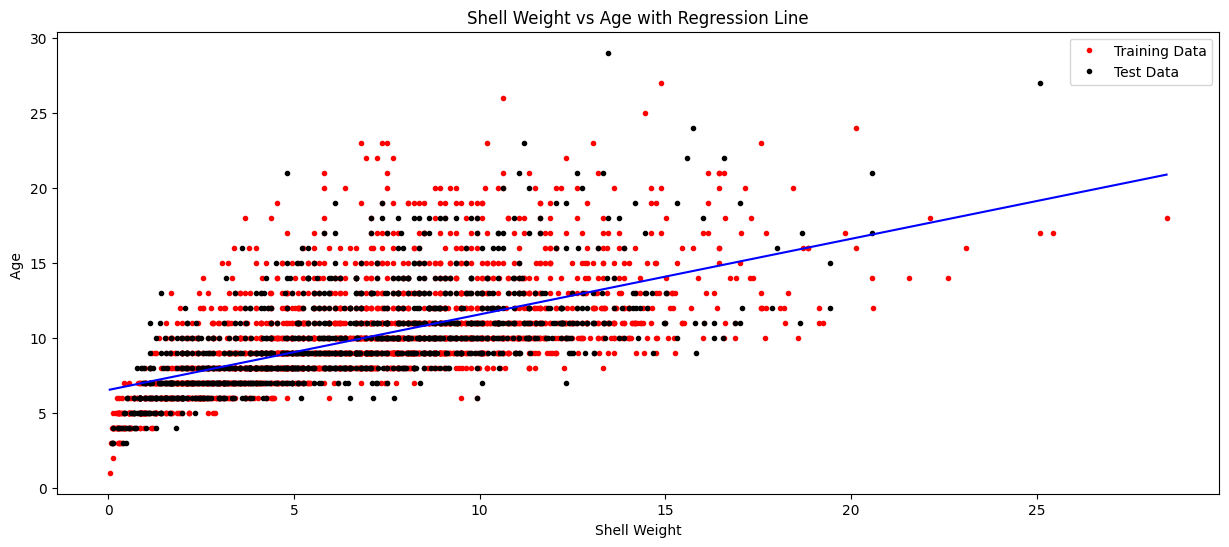

In [27]:
## Determine limits (min/max) of lstat and calculate the corresponding value of medv. Important: this can be done between
## only two points because this is a linear regression.
limits_age = np.array([min(X), max(X)])
medv_shell_weight = regr.intercept_[0] + regr.coef_[0][0]*limits_age


## Plot the scatterplot and the regression line
plt.rcParams['figure.figsize'] = [15, 6]
plt.pyplot.plot(db_train['shell_weight'], db_train['age'], '.r', label='Training Data')
plt.pyplot.plot(db_test['shell_weight'], db_test['age'], '.k', label='Test Data')
plt.pyplot.plot(limits_age, medv_shell_weight, 'b-')

plt.pyplot.title('Shell Weight vs Age with Regression Line')
plt.pyplot.xlabel('Shell Weight')
plt.pyplot.ylabel('Age ')

plt.pyplot.legend()
plt.pyplot.show()

**2.8** Perform a multiple linear regression considering `age` as the response and using all numerical predictors.
Compare the $R^2$ of the simple linear regression model and the multiple linear regression model.

In [28]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Prepare the inputs and outputs
cols = ['length', 'diameter', 'height', 'weight', 'shucked_weight', 'viscera_weight', 'shell_weight']
X = db[cols].values
y = db['age'].values  # No need to reshape

# Use PolynomialFeatures with interaction_only to transform the input matrix
poly = PolynomialFeatures(interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X)

# Fit the data to the linear model
regr = LinearRegression()
regr.fit(X_poly, y)

# Print the results
# Get the feature names after transformation
feature_names = poly.get_feature_names_out(cols)

# Create the equation
equation = 'age = {:.4f}'.format(regr.intercept_)
for coef, name in zip(regr.coef_, feature_names):
    equation += ' + {:.4f} * {}'.format(coef, name)

print(equation)

# Calculate the R^2 score between the actual output and the predicted one
age_pred = regr.predict(X_poly)
r2m_value = r2_score(y, age_pred)
print('R^2: {:.4f}'.format(r2m_value))

age = -0.4974 + 0.9471 * length + 12.4590 * diameter + 9.4577 * height + 0.3393 * weight + -0.7714 * shucked_weight + -0.7335 * viscera_weight + 0.8250 * shell_weight + -6.8941 * length diameter + 8.8244 * length height + -0.6452 * length weight + 0.9939 * length shucked_weight + -0.5305 * length viscera_weight + 1.0610 * length shell_weight + -16.0252 * diameter height + 0.7908 * diameter weight + -1.0313 * diameter shucked_weight + 1.3269 * diameter viscera_weight + -1.5063 * diameter shell_weight + 0.5812 * height weight + -1.6522 * height shucked_weight + -0.1843 * height viscera_weight + 0.6344 * height shell_weight + 0.0111 * weight shucked_weight + -0.0383 * weight viscera_weight + -0.0048 * weight shell_weight + 0.0590 * shucked_weight viscera_weight + -0.0356 * shucked_weight shell_weight + 0.0181 * viscera_weight shell_weight
R^2: 0.5624


In [29]:
header_html = f"""
<div style="background-color: #d0e7ff; padding: 10px; border-radius: 5px; color: #003366;">
  <p>
  <strong>Answer:</strong><br>
  
  It is possible to observe that the R-squared value for the simple linear regression model (\\( R^2 = {np.round(r2_value,3)} \\))
  is inferior to the R-squared value for the multiple linear regression (\\( R^2 = {np.round(r2m_value,3)} \\)). 
  Because the coefficient of determination R-squared is a statistical measure of how well a regression line approximates the actual data, 
  adding predictors will generally provide more information about the dependent variable. 
  As such, it will allow for a better aproximation to the data, which will typically mean a higher R-squared value.

  </p>
</div>
"""
display(HTML(table_style + header_html))

**2.9** Perform a multiple  linear regression considering `age` as the response and using all predictors. Comment on the $R^2$ of this model.

In [30]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Convert 'sex' to binary (1 for 'male', 0 for 'female')
db_dummies = pd.get_dummies(db, columns=['sex'], drop_first=True)
db_dummies.head()

length  diameter  height     weight  shucked_weight  viscera_weight  \
0  1.4375    1.1750  0.4125  24.635715       12.332033        5.584852   
1  0.8875    0.6500  0.2125   5.400580        2.296310        1.374951   
2  1.0375    0.7750  0.2500   7.952035        3.231843        1.601747   
3  1.1750    0.8875  0.2500  13.480187        4.748541        2.282135   
4  0.8875    0.6625  0.2125   6.903103        3.458639        1.488349   

   shell_weight  age  sex_I  sex_M  
0      6.747181    9  False  False  
1      1.559222    6  False   True  
2      2.764076    6   True  False  
3      5.244657   10  False  False  
4      1.700970    6   True  False

In [31]:

# Prepare the inputs and outputs
cols = ['length', 'diameter', 'height', 'weight', 'shucked_weight', 'viscera_weight', 'shell_weight', 'sex_I','sex_M']
X = db_dummies[cols].values  # Use the correct columns
y = db['age'].values  # No need to reshape

# Use PolynomialFeatures with interaction_only to transform the input matrix
poly = PolynomialFeatures(interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X)

# Fit the data to the linear model
regr = LinearRegression()
regr.fit(X_poly, y)

# Print the results
# Get the feature names after transformation
feature_names = poly.get_feature_names_out(cols)

# Create the equation
equation = 'age = {:.4f}'.format(regr.intercept_)
for coef, name in zip(regr.coef_, feature_names):
    equation += ' + {:.4f} * {}'.format(coef, name)

print(equation)

# Calculate the R^2 score between the actual output and the predicted one
age_pred = regr.predict(X_poly)
r2a_value = r2_score(y, age_pred)
print('R^2: {:.4f}'.format(r2a_value))

age = -0.5110 + 6.6735 * length + 11.8950 * diameter + 1.5747 * height + 0.5541 * weight + -1.4460 * shucked_weight + -0.6776 * viscera_weight + 0.4802 * shell_weight + -0.1973 * sex_I + -0.8123 * sex_M + -10.7324 * length diameter + 6.0095 * length height + -0.6284 * length weight + 0.9842 * length shucked_weight + -0.4856 * length viscera_weight + 1.0030 * length shell_weight + -2.2365 * length sex_I + 2.1586 * length sex_M + -4.8639 * diameter height + 0.6295 * diameter weight + -0.5827 * diameter shucked_weight + 1.2371 * diameter viscera_weight + -1.2082 * diameter shell_weight + -2.1877 * diameter sex_I + -2.8150 * diameter sex_M + 0.4905 * height weight + -1.2046 * height shucked_weight + -0.7550 * height viscera_weight + 0.4906 * height shell_weight + 6.0035 * height sex_I + 1.3052 * height sex_M + 0.0093 * weight shucked_weight + -0.0348 * weight viscera_weight + -0.0030 * weight shell_weight + -0.1711 * weight sex_I + -0.0323 * weight sex_M + 0.0604 * shucked_weight viscera_w

In [32]:
header_html = f"""
<div style="background-color: #d0e7ff; padding: 10px; border-radius: 5px; color: #003366;">
  <p>
  <strong>Answer:</strong><br>
  
  The R-squared value obtained for the linear regression using all predictors 
  (including non-numerical values) was \\( R^2 = {np.round(r2a_value,3)} \\),
  which is superior to both R-squared values previously obtained. 
  Considering the non-numerical values have all been correctly converted
  adding more predictors will only give the model access to more information, 
  allowing for better aproximations and thus, higher R-squared values.
  </p>
</div>
"""
display(HTML(table_style + header_html))

## Section 2 -- Classification

**3.** Suppose that a dataset is divided into two equally-sized training and test sets, and then try out two different classification procedures:

* The first is the logistic regression, obtaining an error rate of 20% on the training data and 30% on the test data.
* The second is a 1-nearest neighbors, with an average error rate (averaged over test and training datasets) of 18%.

Based on these results, which method is preferred for classifying new observations? Why?

<div style="background-color: #d0e7ff; padding: 10px; border-radius: 5px; color: #003366;">
  <p>    
 <strong>Answer:</strong>

Firstly, it is necessary to make some considerations about both methods as to cleary respond to the question at hand.

The Logistic Regression model shows an increase from the training error to the test error, which is to be expected. Also, that increase isn't too significant, and even while evidencing some overfiting to the training data, it also show that the model generalizes reasonably well.

The 1-nearest neighbours shows better average results on the test and training errors, but this method has some disantvantages when compared to the Logistic Regression. Firstly, the 1-nearest neighbours relies heavily on the training data, being more supceptible to overfiting and to noise in the data. Beyond that, the 1-nearest neighbours method also suffers more from what is known as "Curse of Dimentionality" than the Logistic Regression, meaning that this kind of analysis becomes more uncertain when applied to high dimensional spaces.

Therefore, with all these considerations in mind, the preferred method of classification should be the Logistic Regretion, because it shows a good relation between the training and test errors, and because it is less afected by the training data than the 1-nerarest neighbours method.

</p>
</div>

**4.** Consider again the crab dataset.
The objective now is to predict the `sex` of the crab.

**4.1** Disregard the records that have an indeterminate sex.
Split the data into test and training datasets.
Consider a test dataset comprised of 30% of the whole dataset.

In [33]:
from sklearn.model_selection import train_test_split

# Disregarding records with indeterminate sex
db_2 = db[db['sex'] != 'I'].copy()
# Step 2: Convert 'sex' to binary (1 for 'male', 0 for 'female')
db_2['sex'] = db_2['sex'].map({'M': 1, 'F': 0})

# Splitting the data into features (X) and target (y)
X = db_2.drop('sex', axis=1)  # Features
y = db_2['sex']  # Target variable

# Splitting the data into training and test datasets (30% test size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #42 Is the solution

# Defining the HTML for the header with the formula
header_html = f"""
<div style="background-color: #d0e7ff; padding: 10px; border-radius: 5px; color: #003366;">
  <p>
    <strong>Head of X_Test DataSet</strong><br>
  </p>
  {X_test.head().to_html(index = False, border = 0, classes = 'dataframe', justify = 'center')}
    <p>
    <strong>Head of X_Train DataSet</strong><br>
  </p>
  {X_train.head().to_html(index = False, border = 0, classes = 'dataframe', justify = 'center')}
</div>

"""
# Display the header with the formula
display(HTML(header_html))


**4.2** Train a Logistic Regression model and report the accuracy and confusion matrix for the test set.

In [34]:
import math as lgalego
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred);
conf_matrix = confusion_matrix(y_test, y_pred);

# Create a DataFrame for the confusion matrix
df_cm = pd.DataFrame(conf_matrix, index=["Actual Negative", "Actual Positive"],
                     columns=["Predicted Negative", "Predicted Positive"])


#Create a DataFrame for the Classification Report
report_dict = classification_report(y_test, y_pred, output_dict=True)
df_rp = pd.DataFrame(report_dict).transpose()

#Old method to display values
#display(df_cm)
#display(np.round((np.multiply(df_rp,100)),2))
#print(f"Accuracy: {accuracy * 100:.2f}%")

header_html = f"""
<div style="background-color: #d0e7ff; padding: 10px; border-radius: 5px; color: #003366;">
    <p>
      <strong>Confusion Matrix:</strong>
    </p>
      {df_cm.to_html(index = True, border = 0, classes = 'dataframe', justify = 'center')}
      
    <p>
        <strong>Classification Report:</strong>
    </p>
        {np.round((np.multiply(df_rp,100)),2).to_html(index = True, border = 0, classes = 'dataframe', justify = 'center')}
    <p>
        <strong>Accuracy:</strong>
        {accuracy * 100:.2f}%
    </p>
</div>
"""
display(HTML(table_style + header_html))

**4.3** Train a Linear Discriminant Analysis (LDA) model and report the accuracy and confusion matrix for the test set.

In [35]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Train the Linear Discriminant Analysis model
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)

# Make predictions
y_pred = lda_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred);
conf_matrix = confusion_matrix(y_test, y_pred);

# Create a DataFrame for the confusion matrix
df_cm = pd.DataFrame(conf_matrix, index=["Actual Negative", "Actual Positive"],
                     columns=["Predicted Negative", "Predicted Positive"])


#Create a DataFrame for the Classification Report
report_dict = classification_report(y_test, y_pred, output_dict=True)
df_rp = pd.DataFrame(report_dict).transpose()

#Old method to display values
#display(df_cm)
#display(np.round((np.multiply(df_rp,100)),2))
#print(f"Accuracy: {accuracy * 100:.2f}%")

header_html = f"""
<div style="background-color: #d0e7ff; padding: 10px; border-radius: 5px; color: #003366;">
    <p>
      <strong>Confusion Matrix:</strong>
    </p>
      {df_cm.to_html(index = True, border = 0, classes = 'dataframe', justify = 'center')}
      
    <p>
        <strong>Classification Report:</strong>
    </p>
        {np.round((np.multiply(df_rp,100)),2).to_html(index = True, border = 0, classes = 'dataframe', justify = 'center')}
    <p>
        <strong>Accuracy:</strong>
        {accuracy * 100:.2f}%
    </p>
</div>
"""
display(HTML(table_style + header_html))

**4.4** Train a Nearest Neighbors model. Describe and implement an approach to choose the number of neighbors. Report the accuracy and confusion matrix for the test set.

In [36]:
header_html = f"""
<div style="background-color: #d0e7ff; padding: 10px; border-radius: 5px; color: #003366;">
  <p>
  <strong>Answer:</strong><br>
  
  The approach used to choose the number of neighbors was evaluating performance with cross-validation. For that, firstly the model was trained on different numbers of neighbors (given by k). The performance of the model was then evaluated in terms of accuracy, and the k value chosen was the one which maximised the performance.
  </p>
</div>
"""
display(HTML(table_style + header_html))

In [37]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Choose the optimal number of neighbors
k_values = range(1, 21)
mean_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5)
    mean_scores.append(scores.mean())

# Plot the mean accuracy for different k values
plt.pyplot.figure(figsize=(10, 6))
plt.pyplot.plot(k_values, mean_scores, marker='o')
plt.pyplot.title('KNN: Choosing the Optimal Number of Neighbors')
plt.pyplot.xlabel('Number of Neighbors (k)')
plt.pyplot.ylabel('Mean Accuracy')
plt.pyplot.xticks(k_values)
plt.pyplot.grid()
plt.pyplot.show()

# Train the KNN model with the optimal k (let's say k=5 based on the plot)
optimal_k = 5
knn_model = KNeighborsClassifier(n_neighbors=optimal_k)
knn_model.fit(X_train, y_train)

# Make predictions
y_pred = knn_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred);
conf_matrix = confusion_matrix(y_test, y_pred);

# Create a DataFrame for the confusion matrix
df_cm = pd.DataFrame(conf_matrix, index=["Actual Negative", "Actual Positive"],
                     columns=["Predicted Negative", "Predicted Positive"])


#Create a DataFrame for the Classification Report
report_dict = classification_report(y_test, y_pred, output_dict=True)
df_rp = pd.DataFrame(report_dict).transpose()

#Old method to display values
#display(df_cm)
#display(np.round((np.multiply(df_rp,100)),2))
#print(f"Accuracy: {accuracy * 100:.2f}%")

header_html = f"""
<div style="background-color: #d0e7ff; padding: 10px; border-radius: 5px; color: #003366;">
    <p>
      <strong>Confusion Matrix:</strong>
    </p>
      {df_cm.to_html(index = True, border = 0, classes = 'dataframe', justify = 'center')}
      
    <p>
        <strong>Classification Report:</strong>
    </p>
        {np.round((np.multiply(df_rp,100)),2).to_html(index = True, border = 0, classes = 'dataframe', justify = 'center')}
    <p>
        <strong>Accuracy:</strong>
        {accuracy * 100:.2f}%
    </p>
</div>
"""
display(HTML(table_style + header_html))

**4.5** Plot the ROC curve and calculate the area under curve (AUC) for each model you trained. Comment on the results.

In [38]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc

# Train the models
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Get predicted probabilities
y_pred_logistic = logistic_model.predict_proba(X_test)[:, 1]
y_pred_lda = lda_model.predict_proba(X_test)[:, 1]
y_pred_knn = knn_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC for each model
fpr_logistic, tpr_logistic, _ = roc_curve(y_test, y_pred_logistic)
roc_auc_logistic = auc(fpr_logistic, tpr_logistic)

fpr_lda, tpr_lda, _ = roc_curve(y_test, y_pred_lda)
roc_auc_lda = auc(fpr_lda, tpr_lda)

fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Plot ROC curves
plt.pyplot.figure(figsize=(10, 6))
plt.pyplot.plot(fpr_logistic, tpr_logistic, color='cyan', label=f'Logistic Regression (AUC = {roc_auc_logistic:.2f})')
plt.pyplot.plot(fpr_lda, tpr_lda, color='magenta', label=f'LDA (AUC = {roc_auc_lda:.2f})')
plt.pyplot.plot(fpr_knn, tpr_knn, color='aquamarine', label=f'KNN (AUC = {roc_auc_knn:.2f})')
plt.pyplot.plot([0, 1], [0, 1], 'p--', label='Random Guess')
plt.pyplot.xlabel('False Positive Rate')
plt.pyplot.ylabel('True Positive Rate')
plt.pyplot.title('ROC Curves for Different Models')
plt.pyplot.legend()
plt.pyplot.grid()
plt.pyplot.show()

**4.6** A considerable part of the crab records in the dataset do not have a determined sex.
How can you build a model that makes a prediction of the sex for these records?
Describe every step of your approach.

<div style="background-color: #d0e7ff; padding: 10px; border-radius: 5px; color: #003366;">
  <p>      
 <strong>Answer:</strong>

The goal is to predict the sex of crabs (male or female) based on available features in the dataset, using records that have known sex as training data. Firstly, it is necessary to obtain the dataset containing crab records, including various features that may correlate with sex (e.g., size, weight, height, diameter, etc).

Next, the dataset should be serached for any missing values, which can then involve dropping rows containing those values. Categorical variables (like 'sex' in this case) can be converted into numerical format using techniques such as one-hot encoding or label encoding. For algorithms sensitive to feature scales (like KNN), it will also be necessary to normalize or standardize numerical features.

With the necessary alterations to the raw datasets made, it is possible to vizualize data correlations through, for example, scatter plots or heatmaps. This can help to understand the distribution of features and their relationship with the target variable 'sex'. Checking for correlations between features and the target variable allows to identify potentially useful predictors. 

The dataset should then be divided into training and test datasets, the former containing the known sexes (male and female) and the latter being made up values pertaining to undetermined sex. A percentage for what part of each dataset should be chosen (for example, one can use 80% of the data for training and 20% for testing).

These datasets will be used to train a classification model of choice (for example Logistic Regression, KNN, Neural Networks, etc.), by fitting the model on the training set using the predictors. Cross Validation can be used to assess model performance and avoid overfitting. This involves splitting the training data into k subsets and training the model k times, each time using a different subset as the validation set. 

The test dataset will be used to evaluate the performance of the model, considering metrics like accuracy, precision, recall, F1 Score, etc.

After the model is trained, it can be used to predict the sex for records with indetermined sex in the dataset. The model can be analyzed to understand which features are most influential in predicting sex, for example, by using feature importance scores (for tree-based models) or coefficients (for logistic regression).

If the model performs satisfactorily, it can be deployed for use in predicting sex for new records in the dataset or integrating it into a larger system.

Additionally, it is possible to continuously monitor the model's performance over time and update it as necessary with new data or improved algorithms, or even retrain the model with new data to maintain accuracy.

  </p>
</div>

## Section 3 -- Bootstrap and k-Fold

**3.1** Explain how k-fold cross-validation is implemented.

<div style="background-color: #d0e7ff; padding: 10px; border-radius: 5px; color: #003366;">
  <p>    
 <strong>Answer:</strong>

 K-fold cross validation is a widely used method for estimation of the test error that consists in the division of the training data in K equal parts, leaving out part k and fitting  the model to the k-1 parts combined, and then obtaining the predictors for the k part.
 This procedure is repeated for each part, and then all the results are combined to  evaluate the performance of the model.

</p>
</div>

**3.2** What are the advantages and disadvantages of k-Fold cross-validation relative to:

1. Validation set approach.
2. Leave One Out Cross-Validation (LOOCV).

<div style="background-color: #d0e7ff; padding: 10px; border-radius: 5px; color: #003366;">
  <p>    
 <strong>Answer:</strong>

Relative to the Validation Set Aproach, the K-fold method has a better estimation of the model, because it implements multiple training and validation steps while the Validation Set Aproach only implements one. The K-fold method also evidences lower bias than the Validation Set Aproach.However, the Validation Set Aproach is a much more simple method tha requires less computational power relative to the K-fold method.

When comparing the K-fold method to the LOOCV,The K-fold method is much less demanding on the hardwere, especialy when aplied to large datasets, while the LOOCV requires the model to be trained n times, with n being the number of data points. LOOCV also evidences more varience, since the model is trained in very similar data sets, because in every iteration only one data point is left out, therefore the sets have a high correlation. On the other hand, LOOCV has lower Bias than the K-fold method.


  </p>
</div>

## Section 4 -- Other Questions

**6.** In your group's option, what are the advantages and disadvantages of using a virtual environment when programming in Python?

<div style="background-color: #d0e7ff; padding: 10px; border-radius: 5px; color: #003366;">
  <p>    
 <strong>Answer:</strong>

Some advantages of using a virtual environment when programming with python are that when using virtual environments, we can better isolate the development of many projects whithout the dependencies of each individual project interfearing with the rest, alowing for a more fluid development of each project and isolated spaces of experimentation.

Some disantvantages are that using virtual environments is more demanding on the hardware, ocupying more disk space, and that using virtual environments is more complex than the alternative, possibly leading to more unseen problems or unaccounted problems in the development of a project, due to inexperience or just lack of rigor.

  </p>
</div>

**7.** In your group's opinion, in what circumstances is it better to use Jupyter Notebooks and when is it better to use Google Colab notebooks? Give some specific examples.

<div style="background-color: #d0e7ff; padding: 10px; border-radius: 5px; color: #003366;">
  <p>        
 <strong>Answer:</strong>

Jupyter Notebooks is a very usefull tool to work on projects done by an individual or on projects that require a very strict control of the environment used. Jupyter runs localy on the computer, giving the user a lot of control over the libraries and software used and over the configurations of the program. It can also be used offline. In an indivudial project that requires a very specific set of libraries or software, or in a context where the user may have to work offline, using Jupyter Notebooks is the best option.

Google Colab shines the most for it's acessability and reach, not requiring much setup, being able to acess resources not run localy on the user's computer. It can easily integrate any other Clod service and is very easily shared between contributors. In a scenario where a team of contributors inteds to work together on a project, Google colabs is a good choice, alowing each user to easily acess the project from a plethora of devices.


  </p>
</div>

**8.** Enter your GitHub repository webpage.

<div style="background-color: #d0e7ff; padding: 10px; border-radius: 5px; color: #003366;">
  <p>        
     https://github.com/Joaomsousa642/07_Project    
  </p>
</div>